<a href="https://colab.research.google.com/github/pjason802/wavelets/blob/master/QU_fitting_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# QU Fitting

In [39]:
pip install nestle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for nestle: filename=nestle-0.2.0-py3-none-any.whl size=12455 sha256=ef7cf2eee06d03bc6e2bc9f292c9f49424b29bc71580a4494c44d326567c00d9
  Stored in directory: /root/.cache/pip/wheels/70/7c/9b/1a17c0baee6f6741119e272d5dff576bb8abcd58afe4311d52
Successfully built nestle


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy

import astropy.units as u
import astropy.constants as c
from astropy.table import Table
from astropy.io import fits

import os

from scipy import signal


In [ ]:
pip install bilby

In [17]:
from astropy.io import ascii
#from QU_fitting 
#import do_QUfit_1D_mnest.py
#import unicodedata
#from RMtools_1D import models_ns
import subprocess

In [ ]:
# write each source as a ACSii file from its fits file

# Read each source spectra in as astropy Table
path = 'raw_possum_data_fdf_spectra/'
cat_spec_ds = fits.open(path + 'SMC_spectra.merge_ds.fits') # ds = diffuse subtracted 
cat_spec_ds = Table.read(cat_spec_ds, format='fits')

In [18]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# write each source as ASCii file of [freq_Hz, I, Q, U, dI, dQ, dU]

for i in np.arange(len(cat_spec_ds)): # len(cat_spec_ds)  
    data_RMS_ds_I = (cat_spec_ds['freq'][i], cat_spec_ds['stokesI'][i], cat_spec_ds['stokesQ'][i], cat_spec_ds['stokesU'][i],
            cat_spec_ds['stokesI_error'][i], cat_spec_ds['stokesU_error'][i], cat_spec_ds['stokesQ_error'][i])
    
    filename = 'source_{}.txt'.format(i)
    filepath = os.path.join('QU_fitting/sources_forQU', filename)
    
    with open(filepath, 'w') as f:
        for row in data_RMS_ds_I:
            f.write(' '.join(map(str, row)) + '\n')

TypeError: write() takes no keyword arguments

In [ ]:
# jackies code for QU fitting with a timeout limit

#'QU_fitting/sources_forQU_test1/source_0.dat'

timeout_count = 0 ## Count how many times did QU-fitting time-out
output_file_path = '/content/blanck.txt'
while os.path.exists(output_file_path == False and timeout_count < 1):
    try:
        subprocess.run(['python3', 'QU_fitting/do_QUfit_1D_mnest.py', 'source_0.txt', '-m', '11', '--sampler', 'nestle', '--ncores', '8', '--nlive', '128'], stdout=subprocess.DEVNULL, stderr=subprocess.DEVNULL, timeout=120)
    except subprocess.TimeoutExpired:
        timeout_count += 1 

In [27]:
import subprocess

# Define the Git repository URL and the directory where you want to clone it
repo_url = "https://github.com/CIRADA-Tools/RM-Tools.git"
clone_dir = "/content/rmstuff"

# Run the Git clone command using subprocess
subprocess.run(["git", "clone", repo_url, clone_dir])


CompletedProcess(args=['git', 'clone', 'https://github.com/CIRADA-Tools/RM-Tools.git', '/content/rmstuff'], returncode=0)

In [37]:

from rmstuff import RMtools_1D, RMutils
from RMtools_1D import do_RMsynth_1D
import do_QUfit_1D_mnest


Format [freq_Hz, I, Q, U, dI, dQ, dU]
Plotting the input data and spectral index fit.


02:04 bilby INFO    : Running for label 'm11', output will be saved to 'QU_fitting/runs_test_1prefixOut_m11_nestle/'



Loading the model from 'models_ns/m11.py' ...


02:04 bilby INFO    : Analysis priors:
02:04 bilby INFO    : fracPol1=Uniform(minimum=0.001, maximum=1.0, name='fracPol1', latex_label='$p_1$', unit=None, boundary=None)
02:04 bilby INFO    : fracPol2=Uniform(minimum=0.001, maximum=1.0, name='fracPol2', latex_label='$p_2$', unit=None, boundary=None)
02:04 bilby INFO    : psi01_deg=Uniform(minimum=0, maximum=180.0, name='psi01_deg', latex_label='$\\psi_{0,1}$ (deg)', unit=None, boundary='periodic')
02:04 bilby INFO    : psi02_deg=Uniform(minimum=0, maximum=180.0, name='psi02_deg', latex_label='$\\psi_{0,2}$ (deg)', unit=None, boundary='periodic')
02:04 bilby INFO    : RM1_radm2=Uniform(minimum=-1100.0, maximum=1100.0, name='RM1_radm2', latex_label='$\\phi_1$ (rad m$^{-2}$)', unit=None, boundary=None)
02:04 bilby INFO    : RM2_radm2=Uniform(minimum=-1100.0, maximum=1100.0, name='RM2_radm2', latex_label='$\\phi_2$ (rad m$^{-2}$)', unit=None, boundary=None)
02:04 bilby INFO    : delta_RM1_RM2_radm2=Constraint(minimum=0, maximum=2200.0, nam

it=   265 logz=-1000000000000000052504760255204420248704468581108159154915854115511802457988908195786371375080447864043704443832883878176942523235360430575644792184786706982848387200926575803737830233794788090059368953234970799945081119038967640880074652742780142494579258788820056842838115669472196386865459400540160.000000

02:04 bilby INFO    : Run interrupted by signal 2: checkpoint and exit on 130


SystemExit: ignored

/usr/local/lib/python3.9/dist-packages/IPython/core/interactiveshell.py:3334: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


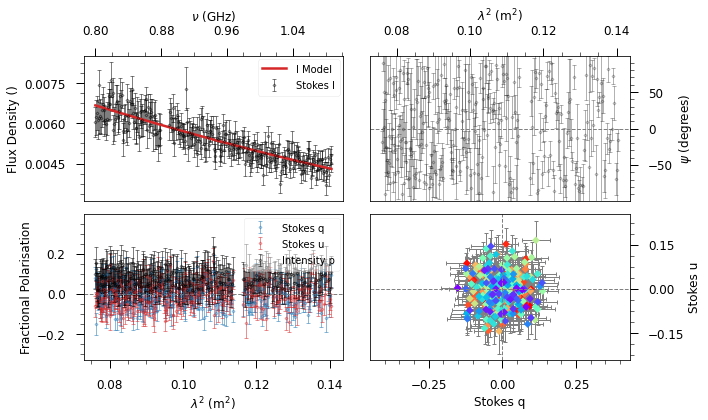

In [40]:
#data_RMS_ds_Ibbbb = (cat_spec_ds['freq'][3000], cat_spec_ds['stokesI'][3000], cat_spec_ds['stokesQ'][3000], cat_spec_ds['stokesU'][3000],
#            cat_spec_ds['stokesI_error'][3000], cat_spec_ds['stokesU_error'][3000], cat_spec_ds['stokesQ_error'][3000])

#do_QUfit_1D_mnest.run_qufit(data_RMS_ds_Ibbbb, modelNum= 11)


data = (np.genfromtxt('source_0.txt'))

output_file_path = 'QU_fitting/runs_test_1'


do_QUfit_1D_mnest.run_qufit(
    data,
    modelNum = 11,
    polyOrd=2,
    nBits=32,
    noStokesI=False,
    showPlots=False,
    debug=False,
    verbose=False,
    sampler="nestle",
    fit_function="log",
    ncores=1,
    nlive=1000,
    prefixOut= output_file_path + "prefixOut",)


In [ ]:
pip install nestle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for nestle: filename=nestle-0.2.0-py3-none-any.whl size=12455 sha256=bcc5e42965cc005ae18d3916ac153a214d87492524b76ac4863380193c0cfe16
  Stored in directory: /root/.cache/pip/wheels/70/7c/9b/1a17c0baee6f6741119e272d5dff576bb8abcd58afe4311d52
Successfully built nestle


## Other 

directory = 'QU_fitting/sources_forQU/source_0.dat'
for filename in os.listdir(directory):

In [ ]:
## removed from witing the file

    #table =  Table(data_RMS_ds_I, names = None)
    
    #data_RMS_ds_I = {'freq': cat_spec_ds['freq'][i], 'stokesI': cat_spec_ds['stokesI'][i], 'stokesQ': cat_spec_ds['stokesQ'][i], 'stokesU': cat_spec_ds['stokesU'][i], 'stokesI_error': cat_spec_ds['stokesI_error'][i], 'stokesU_error': cat_spec_ds['stokesU_error'][i], 'stokesQ_error': cat_spec_ds['stokesQ_error'][i]}
    #table = Table(data_RMS_ds_I, names=('freq', 'stokesI', 'stokesQ', 'stokesU', 'stokesI_error', 'stokesU_error', 'stokesQ_error'))
    #dff = pd.DataFrame(data_RMS_ds_I)

    #np.savetxt(filepath, data_RMS_ds_I)
    #ascii_str = dff.to_string(index=False, header=False)
    #ascii_str.write(filepath, format='ascii', overwrite=True, names = None)
    #dff.to_csv(filepath, index=False, header=False)
    #data_RMS_ds_I[np.isnan(data_RMS_ds_I)] = 0
    #data_RMS_ds_I = np.nan_to_num(data_RMS_ds_I, copy=False)

    #np.savetxt(filepath, data_RMS_ds_I, header='', delimiter='\t', fmt='%d')

for i in np.arange(1):    #len(cat_spec_ds)
    column_names = ('freq', 'stokesI', 'stokesQ', 'stokesU', 'stokesI_error', 'stokesU_error', 'stokesQ_error')
    data_RMS_ds_I = Table([cat_spec_ds['freq'][i], cat_spec_ds['stokesI'][i], cat_spec_ds['stokesQ'][i], cat_spec_ds['stokesU'][i],
            cat_spec_ds['stokesI_error'][i], cat_spec_ds['stokesU_error'][i], cat_spec_ds['stokesQ_error'][i]], names=column_names)
    
    filename = 'source_{}.dat'.format(i)
    filepath = os.path.join('QU_fitting/sources_forQU', filename) # might need to remove the column names
    
    data_RMS_ds_I.write(filepath, format='ascii', overwrite=True)
